### Homework 8

이번 과제에서는 이분산 모형의 추정과 리스크 관리와 관련된 고급 통계 기법들을 실습해보도록 한다

#### 1. Data Import

yfinance library를 이용하여 2020년 1월 1일부터 2023년 7월 31일까지의 IBM 기업의 주가를 import 하여 log defference 형태로 수정하라

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

start_date = '2020-01-01'
end_date = '2023-08-01'

ibm = yf.download('IBM', start = start_date, end = end_date)
ibm

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,129.063095,129.942642,128.843216,129.464630,107.512390,3293436
2020-01-03,127.695984,128.929260,127.686424,128.432129,106.654984,2482890
2020-01-06,127.552582,128.336517,127.342255,128.202682,106.464455,2537073
2020-01-07,127.810707,129.024857,127.533463,128.288712,106.535881,3232977
2020-01-08,128.594650,129.885284,128.030594,129.359467,107.425095,4545916
...,...,...,...,...,...,...
2023-07-25,139.419998,140.429993,139.039993,140.330002,138.733490,3770800
2023-07-26,140.440002,141.250000,139.880005,141.070007,139.465073,4046400
2023-07-27,142.300003,143.380005,141.899994,142.970001,141.343445,6331600


In [2]:
ret = np.log(ibm.Close / ibm.Close.shift(1)).dropna()
ret

Date
2020-01-03   -0.008007
2020-01-06   -0.001788
2020-01-07    0.000671
2020-01-08    0.008312
2020-01-09    0.010513
                ...   
2023-07-25    0.005646
2023-07-26    0.005259
2023-07-27    0.013379
2023-07-28    0.003352
2023-07-31    0.005076
Name: Close, Length: 899, dtype: float64

#### 2. GARCH models

**2.1 GARCH model**

$\mathrm{GARCH}$ 모형은 다음과 같이 추정된다

$$r_t = \mu + a_t$$
$$a_t = \sigma_t \epsilon_t$$
$$\sigma_t^2 = \alpha_0 + \sum_{i=1}^m \alpha_i a_{t-1}^2 + \sum_{j=1}^s \beta_j \sigma_{t-j}^2$$

IBM 수익률 벡터를 활용하여 적절한 order를 선택해 $\mathrm{GARCH}$ model을 추정하고, 추정된 변동성을 plotting하여라

In [3]:
import arch

garch_model1 = arch.arch_model(ret, vol = 'GARCH', p = 1, q = 1)
result1 = garch_model1.fit()
print(result1.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 14940286.438950352
Iteration:      2,   Func. Count:     18,   Neg. LLF: 105680784280654.92
Iteration:      3,   Func. Count:     29,   Neg. LLF: 15998917.267561179
Iteration:      4,   Func. Count:     41,   Neg. LLF: -2426.44491370294
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2426.4449163168347
            Iterations: 8
            Function evaluations: 41
            Gradient evaluations: 4
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2426.44
Distribution:                  Normal   AIC:                          -4844.89
Method:            Maximum Likelihood   BIC:                          -4825.68
                          

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003321. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [4]:
garch_model2 = arch.arch_model(ret, vol = 'GARCH', p = 1, q = 2)
result2 = garch_model2.fit()
print(result2.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 6463855.109293972
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1056186.230872824
Iteration:      3,   Func. Count:     33,   Neg. LLF: 4266.175343584766
Iteration:      4,   Func. Count:     43,   Neg. LLF: 224947.22124398634
Iteration:      5,   Func. Count:     55,   Neg. LLF: 29581700215.83891
Iteration:      6,   Func. Count:     68,   Neg. LLF: 79633.69661842259
Iteration:      7,   Func. Count:     80,   Neg. LLF: 10265343.9365596
Iteration:      8,   Func. Count:     93,   Neg. LLF: 702759.297926867
Iteration:      9,   Func. Count:    106,   Neg. LLF: 25762340.0854041
Iteration:     10,   Func. Count:    120,   Neg. LLF: 174059726.79218253
Iteration:     11,   Func. Count:    134,   Neg. LLF: 77565.18835155285
Iteration:     12,   Func. Count:    145,   Neg. LLF: 52995738.211539164
Iteration:     13,   Func. Count:    158,   Neg. LLF: 1947673.486385889
Iteration:     14,   Func. Count:    172,   Neg. LLF: 2048921541

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003321. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [5]:
garch_model2 = arch.arch_model(ret, vol = 'GARCH', p = 2, q = 1)
result2 = garch_model2.fit()
print(result2.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 15553091.485530043
Iteration:      2,   Func. Count:     19,   Neg. LLF: -2425.961120701987
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2425.961123519657
            Iterations: 6
            Function evaluations: 19
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2425.96
Distribution:                  Normal   AIC:                          -4841.92
Method:            Maximum Likelihood   BIC:                          -4817.92
                                        No. Observations:                  899
Date:                Wed, Oct 04 2023   Df Residuals:                      898
Time:         

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003321. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


$\mathrm{GARCH}(1,2)$모형이 가장 잘 설명하므로, $\mathrm{GARCH}(1,2)$을 최종 모형으로 선정한다

Text(0.5, 1.0, 'Conditional Volatility')

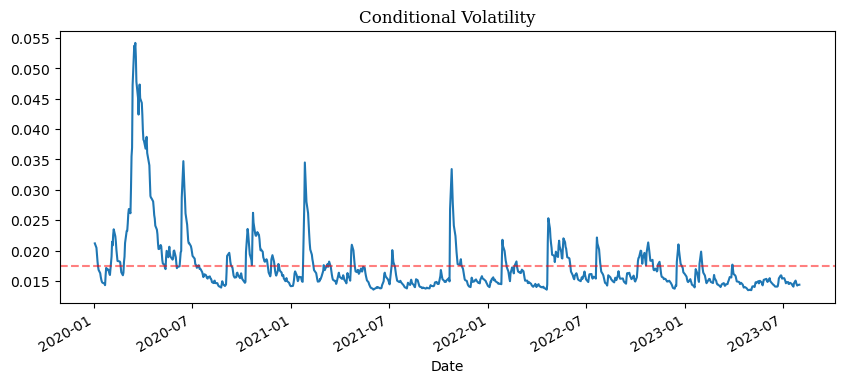

In [6]:
import matplotlib.pyplot as plt
result2.conditional_volatility.plot(figsize = (10, 4))
plt.axhline(result2.conditional_volatility.mean(),
            color = 'red', linestyle = '--', alpha = 0.5)
plt.title('Conditional Volatility', fontfamily = 'Serif', fontsize = 12)

`conditional_volatility` 속성을 통해 추정된 변동성을 추출할 수 있다

**2.2 Exponential GARCH model**

$\mathrm{GARCH}$모형이 금융 시계열에 쓰였을 때 나타나는 단점을 최소화하기 위해서 exponential $\mathrm{GARCH(EGARCH)}$모형을 제안하였다. 좋은 뉴스와 나쁜 뉴스 즉, 음의 충격과 양의 충격에 비대칭적 효과를 고려하여 weight를 조정하였다

$\mathrm{EGARCH}$ 모형은 다음과 같이 나타낼 수 있다

$$r_t = \mu + a_t$$
$$a_t = \sigma_t \epsilon_t$$
$$\ln(\sigma_t^2) = \alpha_0 + \frac{1 +\beta_1 B + \cdots + \beta_{s-1}B^{s-1}}{1 - \alpha_1B - \cdots - \alpha_m B^m}g(\epsilon_{t-1})$$

$$g(\epsilon_t) = \begin{cases}
(\theta + \gamma) \epsilon_t - \gamma E(|\epsilon_t|) ~~~~~ & \mbox{if } \epsilon_t \geq 0\\
(\theta - \gamma) \epsilon_t - \gamma E(|\epsilon_t|) ~~~~~ & \mbox{if } \epsilon_t < 0
\end{cases}$$

한편, python에서는 arch library의 arch_model 함수에서 parameter `vol = EGARCH`로 지정하여 추정할 수 있다

IBM 수익률 벡터에 대해서 $\mathrm{EGARCH}(1,1)$모형을 추정하라. 추정된 변동성에 대해 적절한 방법으로 plotting하여라. **2.1번**의 추정된 결과와 어떤 차이가 있는가?. IBM 주가에 대해서 $\mathrm{EGARCH}(1,1)$ 모형은 유의한가?

In [7]:
egarch = arch.arch_model(ret, vol = 'EGARCH', p = 1, q = 1)
res_egarch = egarch.fit()
print(res_egarch.summary())

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003321. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 1061763178615776.2
Iteration:      2,   Func. Count:     18,   Neg. LLF: 335119703.71597725
Iteration:      3,   Func. Count:     27,   Neg. LLF: 332734015.14006025
Iteration:      4,   Func. Count:     36,   Neg. LLF: -2409.646443249957
Iteration:      5,   Func. Count:     42,   Neg. LLF: -2427.7225963715628
Iteration:      6,   Func. Count:     48,   Neg. LLF: -2429.4572290842857
Iteration:      7,   Func. Count:     53,   Neg. LLF: -2429.4697487591693
Iteration:      8,   Func. Count:     58,   Neg. LLF: -2429.4703131297492
Iteration:      9,   Func. Count:     63,   Neg. LLF: -2429.4703273194245
Iteration:     10,   Func. Count:     67,   Neg. LLF: -2429.470327320812
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2429.4703273194245
            Iterations: 10
            Function evaluations: 67
            Gradient evaluations: 10
                     Constant Mean - EGARCH Model Resu

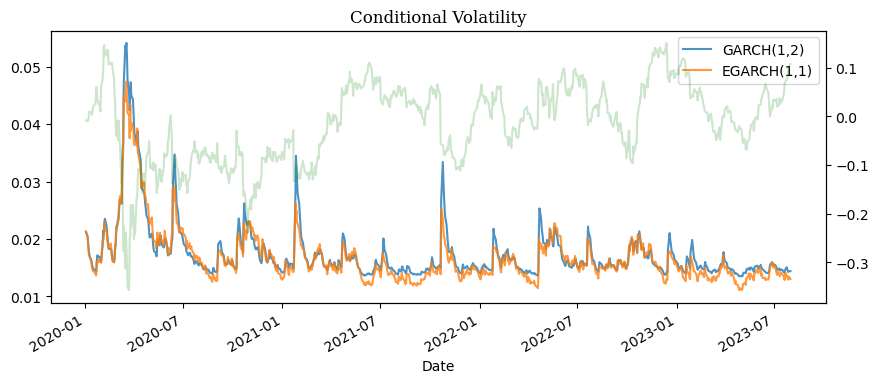

In [8]:
fig, ax = plt.subplots(figsize = (10, 4))
ret.cumsum().plot(secondary_y = True, c = 'g', alpha = 0.2, label = 'Return', ax = ax)
result2.conditional_volatility.plot(alpha = 0.8, label = 'GARCH(1,2)', ax = ax)
res_egarch.conditional_volatility.plot(alpha = 0.8, label = 'EGARCH(1,1)', ax = ax)
ax.legend()
plt.title('Conditional Volatility', fontfamily = 'Serif', fontsize = 12)
plt.show()

#### 3. Value at Risk

재무회계에 있어서 위험은 크게 시장위험, 유동성위험, 신용위험, 운영위험으로 나뉘며, 이중 시장위험을 측정하는데 보편적으로 사용하는 모형은 Value at Risk$\mathrm{(VaR)}$이다. $\mathrm{VaR}$의 측정방법은 다음 네 가지로 분류할 수 있다
1. Econometrics Approach
2. Risk Metrics
3. Quantile Estimation
4. Extreme Value Approach

Econometrics Approach는 $\mathrm{GARCH}$등 변동성 추정 방법을 통해 구하는 방법이며, 다음과 같이 추정한다

$$\mathrm{VaR} = \sigma_t \times z_a$$

여기서 $\sigma_t$는 $\mathrm{GARCH}$모형을 통해 추정된 변동성이며, $z_a$는 한쪽꼬리검정의 신뢰상수를 의미한다. 예를들어, 95%의 신뢰상수는 1.645이며, 99%의 신뢰상수는 2.33이다

Value at Risk를 추정하는 함수를 작성하고 이를 이용해 **Example 2**에서 추정한 두 가지 종류의 $\mathrm{GARCH}$모형에 대해 신뢰수준 95%에서의 일별 $\mathrm{VaR}$을 추정하라. 세 모형의 $\mathrm{VaR}$ 추정값에는 어떤 차이가 있는가?

In [9]:
def value_at_risk(model : pd.Series, z : float = 2.33) -> pd.Series :
    """
    :param model: GARCH모형 추정시 model.conditional_volatility의 값을 넣으시면 됩니다
    :param z: 신뢰상수를 나타냅니다
    :return: Value ar Risk를 최종적으로 출력하는 함수를 작성하시면 됩니다
    """
    var = model * z
    return var

In [10]:
garch_var = value_at_risk(result2.conditional_volatility, z = 1.645)
egarch_var = value_at_risk(res_egarch.conditional_volatility, z = 1.645)

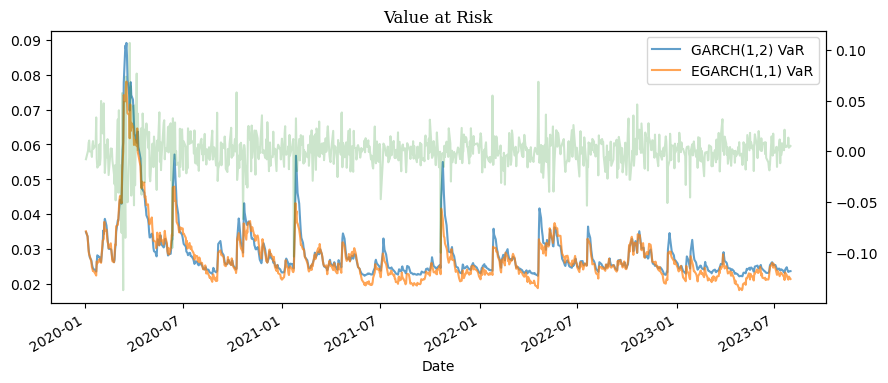

In [11]:
fig, ax = plt.subplots(figsize = (10, 4))
ret.plot(secondary_y = True, c = 'g', alpha = 0.2, label = 'Return', ax = ax)
garch_var.plot(alpha = 0.7, label = 'GARCH(1,2) VaR', ax = ax)
egarch_var.plot(alpha = 0.7, label = 'EGARCH(1,1) VaR', ax = ax)
ax.legend()
plt.title('Value at Risk', fontfamily = 'Serif', fontsize = 12)
plt.show()

#### 4. Exponential Weighted Moving Average Volatility

변동성을 추정하는 방법은 여러가지가 있지만 그중 지수가중이동평균 변동성(EWMA Volatility)는 계산이 편하고 빠르다는 장점 덕분에 근사값으로 널리 사용되고 있다. 또한, 동적으로 변동성을 추정할 수 있다는 장점도 가지고 있다

EWMA 변동성은 다음과 같이 계산된다

$$\mathrm{EWMA}_t = \lambda r_t + (1-\lambda)\mathrm{EWMA}_{t-1}$$

아래 함수는 일별 변동성을 가중이동평균하여 구하는 함수이다. `span`은 가중이동평균할 기간을 의미하며, 보통 10일을 기준으로 한다

IBM 수익률 시계열에 대하여 10일 가중이동평균 변동성을 구하고 적절한 방법으로 시각화하라. **2.1번**에서 추정한 $\mathrm{GARCH}$ 변동성과 비교하라. EWMA 변동성은 $\mathrm{GARCH}$의 추정치 대신 사용 가능한 지표인가?

In [12]:
def ewmaVolatility(close : pd.Series, span : int = 10) -> pd.DataFrame :
    df0 = close.index.searchsorted(close.index - pd.Timedelta(days=1))
    df0 = df0[df0 > 0]
    df0 = (pd.Series(close.index[df0 - 1],
                     index=close.index[close.shape[0] - df0.shape[0]:]))
    try:
        df0 = close.loc[df0.index] / close.loc[df0.values].values - 1  
    except Exception as e:
        print(f'error: {e}\nplease confirm no duplicate indices')
    df0 = df0.ewm(span = span).std().rename('dailyVol')
    return df0

In [13]:
ewma = ewmaVolatility(ibm.Close, span = 10).dropna()
ewma

Date
2020-01-07    0.000474
2020-01-08    0.006320
2020-01-09    0.010135
2020-01-10    0.008367
2020-01-13    0.008407
                ...   
2023-07-25    0.010419
2023-07-26    0.009429
2023-07-27    0.009192
2023-07-28    0.008556
2023-07-31    0.008352
Name: dailyVol, Length: 897, dtype: float64

Text(0.5, 1.0, 'GARCH(1,2) versus EWMA(10)')

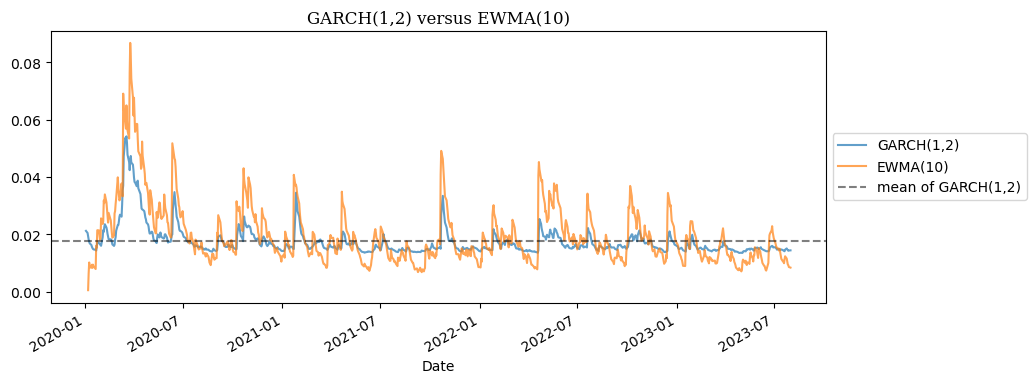

In [14]:
result2.conditional_volatility.plot(figsize = (10, 4), label = 'GARCH(1,2)', alpha = 0.7)
ewma.plot(label = 'EWMA(10)', alpha = 0.7)
plt.axhline(result2.conditional_volatility.mean(),
            color = 'k', linestyle = '--', alpha = 0.5, label = 'mean of GARCH(1,2)')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('GARCH(1,2) versus EWMA(10)', fontfamily = 'Serif', fontsize = 12)

변동성을 과대추정하는 경향이 있긴 하지만, 대체적으로 GARCH모형과 비슷한 양상을 띄고 있고, 오히려 계산이 빠르다는 장점이 있기 때문에 변동성을 추정하는 대체 지표로 사용이 가능하다